In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
galaxydata = pd.read_csv('galaxydatareal.csv')
galaxydata

,name,maj_axis,min_axis,mag,cat_num,in_maj,in_min
0,MCG-05-27-002,8.0,3.0,15.0,NaN,0.0,0.0
1,MCG-05-32-043,7.0,4.0,15.0,NaN,2.0,1.5
2,MCG-05-32-055,6.0,2.0,15.0,NaN,0.0,0.0
3,MCG-05-32-016,0.0,0.0,13.0,NGC 5140,5.0,4.0
4,MCG-05-27-004,6.0,5.0,15.0,NaN,2.0,2.0
...,...,...,...,...,...,...,...
19995,MCG+07-29-049,7.0,4.0,17.0,NaN,2.5,2.0
19996,MCG+07-22-076,6.0,4.0,15.0,NaN,1.0,1.0
19997,MCG+07-21-027,2.5,1.3,17.0,NaN,0.0,0.0
19998,MCG+07-21-020,0.0,0.0,13.0,NGC 3158,5.0,4.5


In [4]:
#Filter Columns 
dataframe = galaxydata[['name', 'maj_axis', 'min_axis']]

dataframe.head()

,name,maj_axis,min_axis
0,MCG-05-27-002,8.0,3.0
1,MCG-05-32-043,7.0,4.0
2,MCG-05-32-055,6.0,2.0
3,MCG-05-32-016,0.0,0.0
4,MCG-05-27-004,6.0,5.0


In [5]:

# We will use the equation "1-b/a = Ellipticity"

# "a" is defined as length of major axis
# "b" is defined as length of minor axis

# From here we will categorize galaxies based on their Ellipticity, where when 0<E<0.3 = "Less Elliptical",
#0.3<E<0.5 = "Average Elliptical", and 0.5<E<0.7 = "More Elliptical"


df1 = pd.DataFrame(galaxydata)

# Step 1: Calculate ellipticity
df1['ellipticity'] = 1 - (df1['min_axis'] / df1['maj_axis'])

# Step 2: Categorize galaxies based on ellipticity
def categorize_ellipticity(ellipticity):
    if 0 < ellipticity < 0.3:
        return "Less Elliptical"
    elif 0.3 <= ellipticity < 0.5:
        return "Average Elliptical"
    elif 0.5 <= ellipticity < 0.7:
        return "More Elliptical"
    else:
        return "Undefined"

df1['ellipticity_category'] = df1['ellipticity'].apply(categorize_ellipticity)

# Step 3: Create a new DataFrame
new_df = df1[['name', 'maj_axis', 'min_axis', 'ellipticity', 'ellipticity_category']]

print(new_df.iloc[0:100,:])

             name  maj_axis  min_axis  ellipticity ellipticity_category
0   MCG-05-27-002       8.0       3.0     0.625000      More Elliptical
1   MCG-05-32-043       7.0       4.0     0.428571   Average Elliptical
2   MCG-05-32-055       6.0       2.0     0.666667      More Elliptical
3   MCG-05-32-016       0.0       0.0          NaN            Undefined
4   MCG-05-27-004       6.0       5.0     0.166667      Less Elliptical
..            ...       ...       ...          ...                  ...
95  MCG-05-48-012      12.0       4.0     0.666667      More Elliptical
96  MCG-05-47-013      10.0       2.0     0.800000            Undefined
97  MCG-05-16-015      14.0       8.0     0.428571   Average Elliptical
98  MCG-05-25-002      10.0       7.0     0.300000   Average Elliptical
99  MCG-05-09-017       0.0       0.0          NaN            Undefined

[100 rows x 5 columns]


In [6]:
import pandas as pd
import numpy as np

# We will use the equation "b/a = 1-n/10
# Rearraged: n = ( 1 - b/a ) * 10

# "a" is defined as length of major axis
# "b" is defined as length of minor axis


# From here we will take these n values and round them to the nearest whole number from 0 to 7
# That will decide the type of galaxy, from E0 (least elongated) all the way to E7 (most elongated)


# Calculate ellipticity and round to 5 decimal places
df1['type_raw'] = (1 - (df1['min_axis'] / df1['maj_axis'])) * 10
df1['type_raw'] = df1['type_raw'].round(5)

df1 = df1.dropna(subset=['type_raw'])

df1 = df1[~df1['type_raw'].isin([np.inf, -np.inf, np.nan])]
df1['type'] = df1['type_raw'].round().astype(int)

# Define the function to categorize 'type'
def categorize_type(type_value):
    if 0 <= type_value <= 7:
        return f'E{type_value}'
    else:
        return 'Not Elliptical'

# Apply the function to create a new column
df1['ellipticity_label'] = df1['type'].apply(categorize_type)

new_df['ellipticity_label'] = df1['ellipticity_label']

# Rename DataFrame to make it distinct
final_df = new_df

cleanfinaldf = final_df.dropna(subset=['ellipticity_label'])

cleanfinaldf

,name,maj_axis,min_axis,ellipticity,ellipticity_category,ellipticity_label
0,MCG-05-27-002,8.0,3.0,0.625000,More Elliptical,E6
1,MCG-05-32-043,7.0,4.0,0.428571,Average Elliptical,E4
2,MCG-05-32-055,6.0,2.0,0.666667,More Elliptical,E7
4,MCG-05-27-004,6.0,5.0,0.166667,Less Elliptical,E2
5,MCG-05-32-053,7.0,2.0,0.714286,Undefined,E7
...,...,...,...,...,...,...
19994,MCG+07-30-065,8.0,1.5,0.812500,Undefined,Not Elliptical
19995,MCG+07-29-049,7.0,4.0,0.428571,Average Elliptical,E4
19996,MCG+07-22-076,6.0,4.0,0.333333,Average Elliptical,E3
19997,MCG+07-21-027,2.5,1.3,0.480000,Average Elliptical,E5


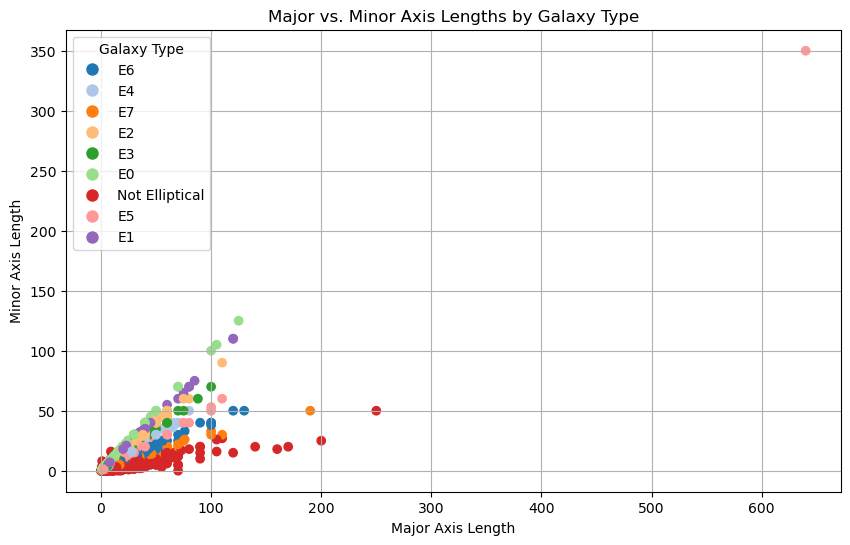

In [8]:
#Plotting

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

data = cleanfinaldf

# Creating a scatter plot, color-coded by galaxy type
fig, ax = plt.subplots(figsize=(10, 6))

# Generate a color map with unique colors for each galaxy type
unique_galaxy_types = data['ellipticity_label'].unique()
color_map = plt.get_cmap('tab20')
colors = {galaxy: color_map(i) for i, galaxy in enumerate(unique_galaxy_types)}

# Scatter plot
scatter = ax.scatter(data['maj_axis'], data['min_axis'], c=data['ellipticity_label'].map(colors))

# Legend
legend_elements = [Line2D([0], [0], marker='o', color='w', label=galaxy, markersize=10, markerfacecolor=color) for galaxy, color in colors.items()]
ax.legend(handles=legend_elements, title="Galaxy Type")

ax.set_xlabel('Major Axis Length')
ax.set_ylabel('Minor Axis Length')
ax.set_title('Major vs. Minor Axis Lengths by Galaxy Type')
plt.grid(True)
plt.show()


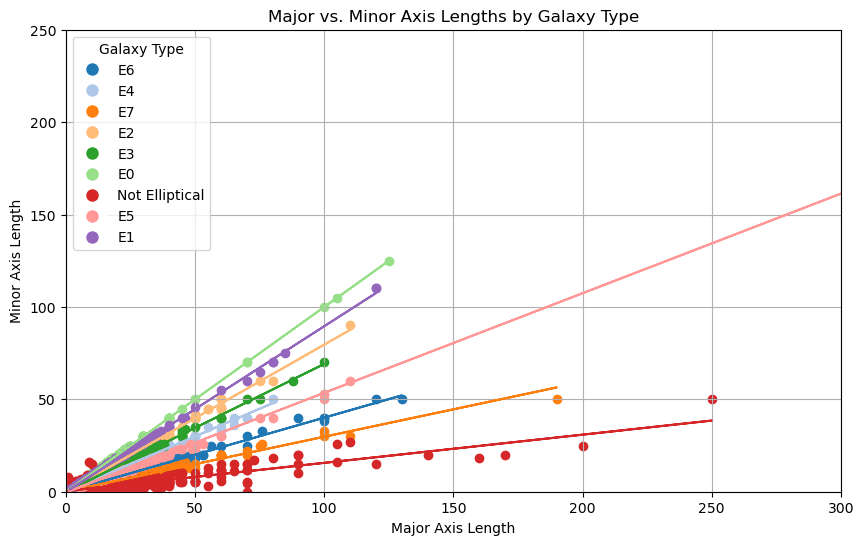

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Zoom into the region by setting the limits
x_limit = (0, 300)
y_limit = (0, 250)

# Creating a scatter plot color-coded by galaxy type
fig, ax = plt.subplots(figsize=(10, 6))

# Generate a color map with unique colors for each galaxy type
unique_ellipticity_labels = cleanfinaldf['ellipticity_label'].unique()
color_map = plt.get_cmap('tab20')
colors = {label: color_map(i) for i, label in enumerate(unique_ellipticity_labels)}

# Plot each galaxy type separately to fit a trendline
for label in unique_ellipticity_labels:
    # Select data for galaxy type
    label_data = cleanfinaldf[cleanfinaldf['ellipticity_label'] == label]
    
    # Scatter plot for this galaxy type
    ax.scatter(label_data['maj_axis'], label_data['min_axis'], color=colors[label], label=label)
    
    # Fit a linear trendline
    z = np.polyfit(label_data['maj_axis'], label_data['min_axis'], 1)
    p = np.poly1d(z)
    
    # Plot the trendline
    ax.plot(label_data['maj_axis'], p(label_data['maj_axis']), color=colors[label])

# Set the x and y limits to zoom
ax.set_xlim(x_limit)
ax.set_ylim(y_limit)

# Legend
legend_elements = [Line2D([0], [0], marker='o', color='w', label=label, markersize=10, markerfacecolor=color) for label, color in colors.items()]
ax.legend(handles=legend_elements, title="Galaxy Type")

ax.set_xlabel('Major Axis Length')
ax.set_ylabel('Minor Axis Length')
ax.set_title('Major vs. Minor Axis Lengths by Galaxy Type')
plt.grid(True)
plt.show()


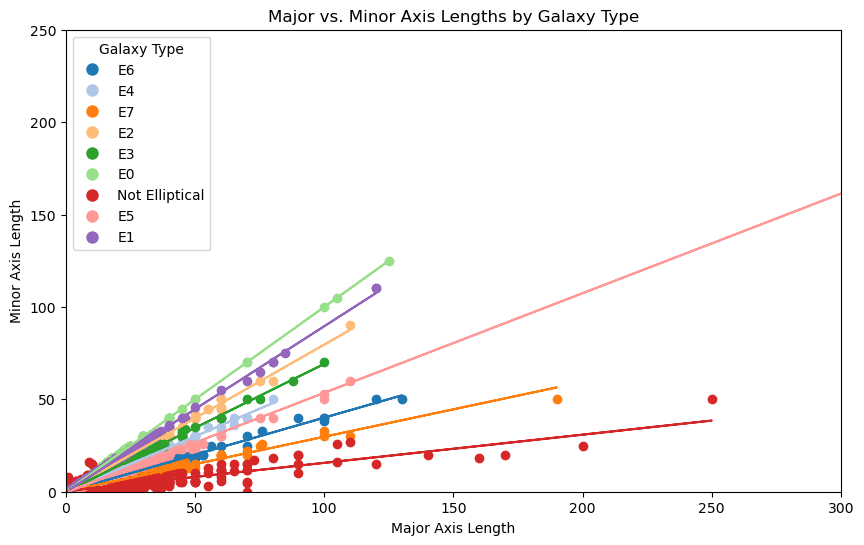

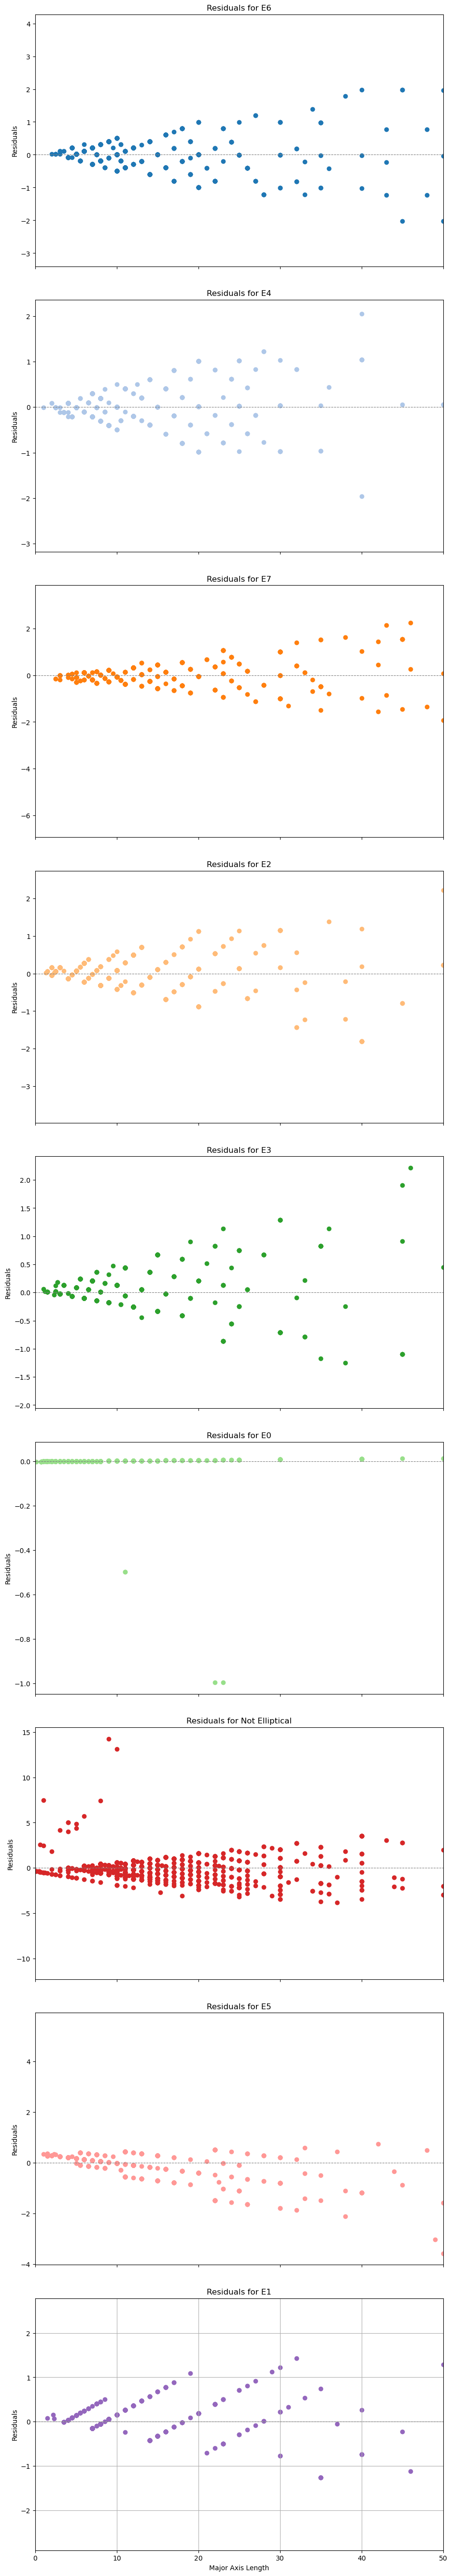

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Assuming cleanfinaldf is your prepared DataFrame with the ellipticity_label column

# Define the x limits for the scatter and residual plots to focus on the region with most data points
x_scatter_limit = (0, 300)
y_scatter_limit = (0, 250)
x_residual_limit = (0, 50)  # You can adjust this to focus on the area of interest in the residuals

# Initialize a figure for the scatter plots with trendlines
fig_scatter, ax_scatter = plt.subplots(figsize=(10, 6))

# Generate a color map with unique colors for each galaxy type
unique_ellipticity_labels = cleanfinaldf['ellipticity_label'].unique()
color_map = plt.get_cmap('tab20')
colors = {label: color_map(i) for i, label in enumerate(unique_ellipticity_labels)}

# Initialize a figure for the residual plots, one subplot for each galaxy type
fig_residuals, axes_residuals = plt.subplots(len(unique_ellipticity_labels), 1, figsize=(10, 6 * len(unique_ellipticity_labels)), sharex=True)

# Plot each galaxy type separately to fit a trendline and calculate residuals
for i, label in enumerate(unique_ellipticity_labels):
    # Select data for galaxy type
    label_data = cleanfinaldf[cleanfinaldf['ellipticity_label'] == label]
    
    # Scatter plot for this galaxy type on the main scatter plot
    ax_scatter.scatter(label_data['maj_axis'], label_data['min_axis'], color=colors[label], label=label)
    
    # Fit a linear trendline
    z = np.polyfit(label_data['maj_axis'], label_data['min_axis'], 1)
    p = np.poly1d(z)
    
    # Plot the trendline on the scatter plot
    ax_scatter.plot(label_data['maj_axis'], p(label_data['maj_axis']), color=colors[label])
    
    # Calculate residuals (actual - predicted)
    residuals = label_data['min_axis'] - p(label_data['maj_axis'])
    
    # Plot the residuals for this galaxy type
    axes_residuals[i].scatter(label_data['maj_axis'], residuals, color=colors[label])
    axes_residuals[i].axhline(0, color='grey', lw=0.8, linestyle='--')
    axes_residuals[i].set_xlim(x_residual_limit)  # Set the x-axis limits for the residuals plots
    axes_residuals[i].set_title(f'Residuals for {label}')
    axes_residuals[i].set_ylabel('Residuals')

# Format the main scatter plot
ax_scatter.set_xlim(x_scatter_limit)
ax_scatter.set_ylim(y_scatter_limit)
ax_scatter.set_xlabel('Major Axis Length')
ax_scatter.set_ylabel('Minor Axis Length')
ax_scatter.set_title('Major vs. Minor Axis Lengths by Galaxy Type')
legend_elements = [Line2D([0], [0], marker='o', color='w', label=label, markersize=10, markerfacecolor=color) for label, color in colors.items()]
ax_scatter.legend(handles=legend_elements, title="Galaxy Type")
plt.grid(True)

# Format the residuals plots
axes_residuals[-1].set_xlabel('Major Axis Length')  # Only set xlabel on the last subplot to avoid clutter
fig_residuals.tight_layout(pad=3.0)  # Adjusts the subplots to fit into the figure area nicely
plt.show()
